# Project Submission

Team:

Gulnara Timokhina  
Varun Bhaseen  
Poornapragna Vadiraj  
Mirsaeid Abolghasemi  

# Business case and value

# Data narrative

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import PyDrive and associated libraries.

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_id = '10TfvNXOANLZDi9JMvbHSg0Mge4xcjd8K'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))
downloaded.GetContentFile('Data_merged.csv')




# Take merged data - 'Data_merged.csv' 

In [0]:
# take merged data
df = pd.read_csv('Data_merged.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1558 non-null   object 
 1   date            1558 non-null   object 
 2   zika_confirmed  1558 non-null   int64  
 3   density_per_km  1558 non-null   float64
 4   location_type   1558 non-null   object 
 5   latitude        1558 non-null   float64
 6   longitude       1558 non-null   float64
 7   mosquito_dist   1558 non-null   float64
 8   max_temp        1558 non-null   float64
 9   mean_temp       1558 non-null   float64
 10  min_temp        1558 non-null   float64
 11  dew_point       1558 non-null   float64
 12  precipitation   1558 non-null   float64
 13  wind            1558 non-null   float64
 14  gdp             1558 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 182.7+ KB


In [0]:
df.head()

location        date  ...  wind    gdp
0  Argentina-Buenos_Aires  2016-03-19  ...  17.0  554.1
1          Argentina-CABA  2016-03-19  ...  17.0  554.1
2     Argentina-Catamarca  2016-03-19  ...  23.0  554.1
3         Argentina-Chaco  2016-03-19  ...   8.0  554.1
4        Argentina-Chubut  2016-03-19  ...  15.0  554.1

[5 rows x 15 columns]

# Make categorical columns numerical


In [0]:
# make non-int columns numerical
from sklearn import preprocessing
lb_make = preprocessing.LabelEncoder()
for i in df.columns:
  #df[i] = lb_make.fit_transform(df[i])
  if df[i].dtype != np.int64:
    df[i] = lb_make.fit_transform(df[i])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   location        1558 non-null   int64
 1   date            1558 non-null   int64
 2   zika_confirmed  1558 non-null   int64
 3   density_per_km  1558 non-null   int64
 4   location_type   1558 non-null   int64
 5   latitude        1558 non-null   int64
 6   longitude       1558 non-null   int64
 7   mosquito_dist   1558 non-null   int64
 8   max_temp        1558 non-null   int64
 9   mean_temp       1558 non-null   int64
 10  min_temp        1558 non-null   int64
 11  dew_point       1558 non-null   int64
 12  precipitation   1558 non-null   int64
 13  wind            1558 non-null   int64
 14  gdp             1558 non-null   int64
dtypes: int64(15)
memory usage: 182.7 KB


# Dropping redundant features

In [0]:
df = df.drop(['date', 'location','location_type','latitude', 'longitude','min_temp','max_temp'],axis=1)
#df = df.drop(['date', 'location','location_type','latitude', 'longitude'],axis=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   zika_confirmed  1558 non-null   int64
 1   density_per_km  1558 non-null   int64
 2   mosquito_dist   1558 non-null   int64
 3   mean_temp       1558 non-null   int64
 4   dew_point       1558 non-null   int64
 5   precipitation   1558 non-null   int64
 6   wind            1558 non-null   int64
 7   gdp             1558 non-null   int64
dtypes: int64(8)
memory usage: 97.5 KB


# Scaling dataset

In [0]:
# scaling dataset
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
df_zika_confirmed = df.drop('zika_confirmed',axis=1)
scaler.fit(df_zika_confirmed)
scaled_features = scaler.fit_transform(df_zika_confirmed)

In [0]:
df_feat = pd.DataFrame(scaled_features,columns=df_zika_confirmed.columns)
df_feat.head()

density_per_km  mosquito_dist  mean_temp  ...  precipitation      wind       gdp
0        1.629793       1.656235  -1.312676  ...       2.624361  1.612275  0.725064
1        1.629793       1.656235  -1.312676  ...       2.624361  1.612275  0.725064
2        1.161395       1.661155  -1.247484  ...       2.078955  1.779701  0.725064
3        0.466272       1.678375  -1.214888  ...       2.386366  0.930610  0.725064
4       -0.612540       1.666075  -1.377867  ...       1.315385  1.552479  0.725064

[5 rows x 7 columns]

# Creating training dataset and target column

In [0]:
X = df_feat
y = df['zika_confirmed']

In [0]:
X

density_per_km  mosquito_dist  ...      wind       gdp
0           1.629793       1.656235  ...  1.612275  0.725064
1           1.629793       1.656235  ...  1.612275  0.725064
2           1.161395       1.661155  ...  1.779701  0.725064
3           0.466272       1.678375  ...  0.930610  0.725064
4          -0.612540       1.666075  ...  1.552479  0.725064
...              ...            ...  ...       ...       ...
1553       -1.427254      -0.255174  ...  0.153272  2.291845
1554        1.308392       1.314297  ...  1.684029  2.291845
1555        0.406476       1.087978  ...  1.684029  2.291845
1556       -0.607557       1.321677  ...  1.576398  2.291845
1557        1.308392       1.316757  ...  1.684029  2.291845

[1558 rows x 7 columns]

# Visualization 

In [0]:
#sns.pairplot(df, hue='zika_confirmed')

In [0]:
#sns.set_style('whitegrid')
#sns.countplot(x='zika_confirmed',data=df,palette='RdBu_r')

In [0]:
#sns.distplot(df['wind'].dropna(),kde=False,color='darkred',bins=30)

In [0]:
#sns.distplot(df['mosquito_dist'].dropna(),kde=False,color='darkred',bins=30)

In [0]:
# check correlation
df.corr()

zika_confirmed  density_per_km  ...      wind       gdp
zika_confirmed        1.000000        0.143569  ...  0.117056 -0.275874
density_per_km        0.143569        1.000000  ...  0.112963 -0.315543
mosquito_dist         0.166052        0.088994  ...  0.136125 -0.075962
mean_temp            -0.023520       -0.112077  ... -0.423791  0.126678
dew_point            -0.013651       -0.095828  ... -0.454726  0.120674
precipitation        -0.059725       -0.212508  ... -0.092206  0.337655
wind                  0.117056        0.112963  ...  1.000000 -0.191938
gdp                  -0.275874       -0.315543  ... -0.191938  1.000000

[8 rows x 8 columns]

# The heatmap for the dataset to see the what attributes have more corelation to others

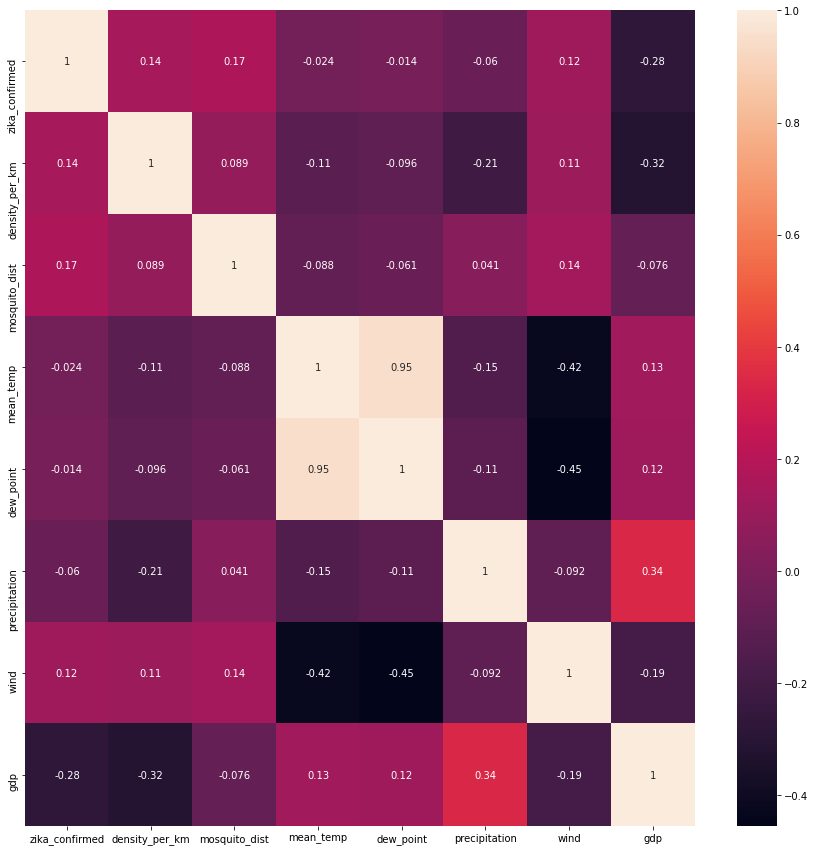

In [0]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

# Plot scatterplot 

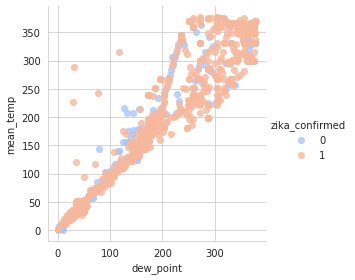

In [0]:
# plot scatterplot between 'dew_point' and 'mean_temp' . 
# Let's try to predict these 2 clusters for zika prediction
sns.set_style('whitegrid')
sns.lmplot('dew_point','mean_temp',data=df, hue='zika_confirmed',
           palette='coolwarm',height=4,aspect=1,fit_reg=False)

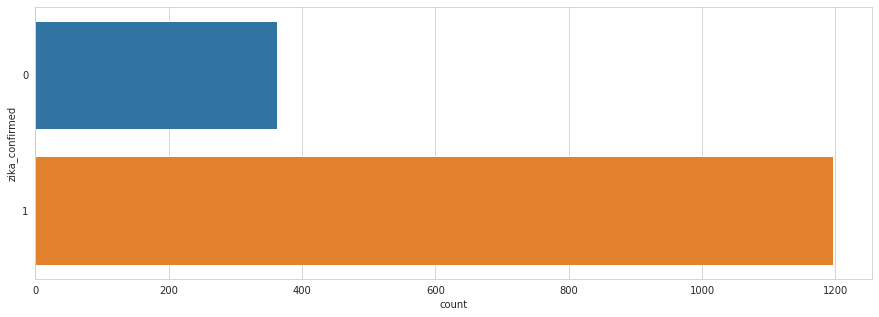

In [0]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'zika_confirmed' , data = df)
plt.show()

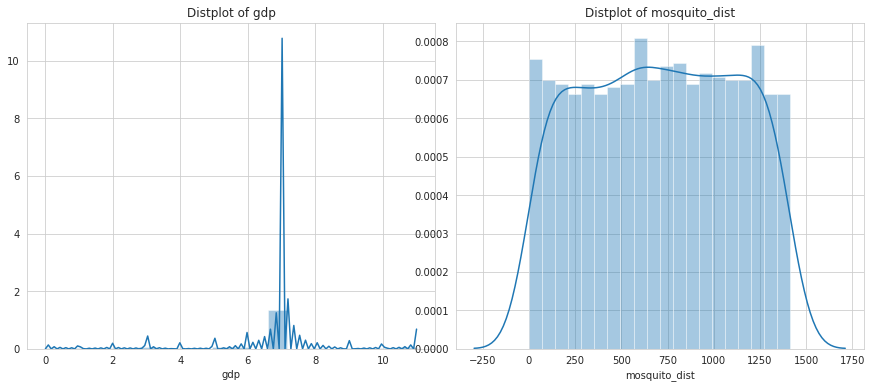

In [0]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['gdp' , 'mosquito_dist']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 00.05)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

## Applying different Algorithms:


# 1. Applying PCA

In [0]:
from sklearn.decomposition import PCA
pca_zika = PCA(n_components=2)
principalComponents_zika = pca_zika.fit_transform(X)


principal_zika_Df = pd.DataFrame(data = principalComponents_zika
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
principal_zika_Df

principal component 1  principal component 2
0                  2.625759               1.519803
1                  2.625759               1.519803
2                  2.582544               1.391101
3                  2.016734               1.946275
4                  2.314229               1.849878
...                     ...                    ...
1553              -0.621781               2.853715
1554               2.148521               2.471626
1555               1.952474               2.917290
1556               1.697803               2.909516
1557               2.148847               2.471460

[1558 rows x 2 columns]

In [0]:
print('Explained variation per principal component: {}'.format(pca_zika.explained_variance_ratio_))

Explained variation per principal component: [0.3389575 0.2252546]


<Figure size 432x288 with 0 Axes>

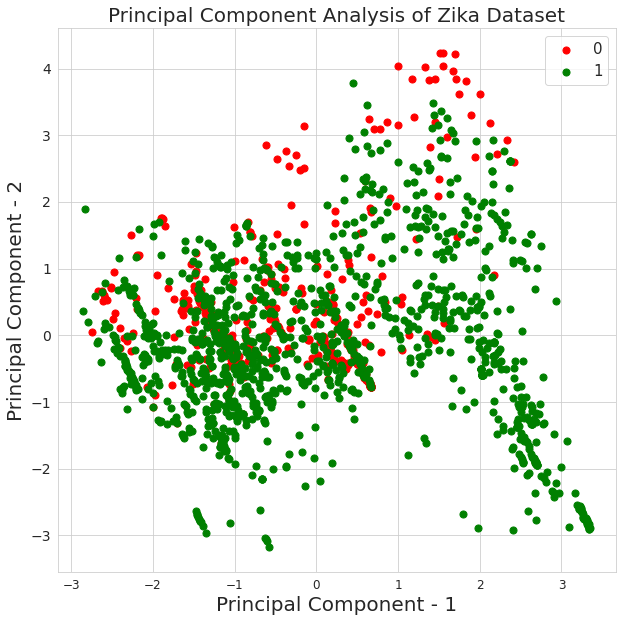

In [0]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Zika Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['zika_confirmed'] == target
    plt.scatter(principal_zika_Df.loc[indicesToKeep, 'principal component 1']
               , principal_zika_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [0]:
# Make an instance of the Model
pca_inst = PCA(.95)

In [0]:
pca_inst.fit(X)
X_pca = pca_inst.transform(X)

# 2. Applying K-Means

In [0]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

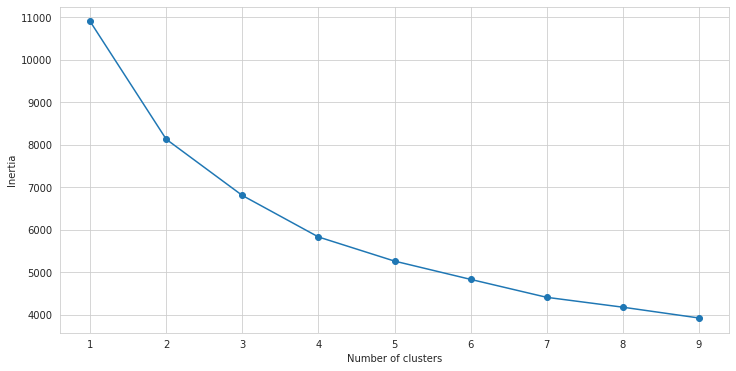

In [0]:
#with better elbow graph
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

#  plot results
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [0]:
# choosing 2 clusters to find clusters for confirmed zika or not
kmeans = KMeans(n_clusters=2, init='k-means++')

In [0]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# check centroids
kmeans.cluster_centers_

array([[ 0.17725227,  0.11772366, -0.98305521, -0.97767668,  0.08816434,
         0.63239121, -0.17136515],
       [-0.13130532, -0.08720758,  0.72822972,  0.72424541, -0.06531057,
        -0.46846411,  0.12694424]])

In [0]:
#kmeans.predict(X)
# predict and save resulting clusters in our dataset 
df['cluster_kmeans'] = kmeans.predict(X)

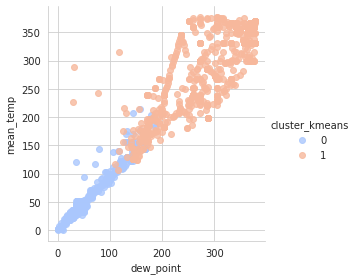

In [0]:
# check predicted clusters visually
sns.set_style('whitegrid')
sns.lmplot('dew_point','mean_temp',data=df, hue='cluster_kmeans',
           palette='coolwarm',height=4,aspect=1,fit_reg=False)

In [0]:
# check silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.24967461582138087

In [0]:
# check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(df['zika_confirmed'], df['cluster_kmeans'])

0.5205391527599487

In [0]:
# check statistics
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['zika_confirmed'], kmeans.labels_))
print(classification_report(df['zika_confirmed'], kmeans.labels_))

[[139 223]
 [524 672]]
              precision    recall  f1-score   support

           0       0.21      0.38      0.27       362
           1       0.75      0.56      0.64      1196

    accuracy                           0.52      1558
   macro avg       0.48      0.47      0.46      1558
weighted avg       0.63      0.52      0.56      1558



In [0]:
df.drop('cluster_kmeans',axis=1)

zika_confirmed  density_per_km  mosquito_dist  ...  precipitation  wind  gdp
0                  1            1353           1381  ...            345   253    8
1                  1            1353           1381  ...            345   253    8
2                  1            1165           1383  ...            290   267    8
3                  1             886           1390  ...            321   196    8
4                  1             453           1385  ...            213   248    8
...              ...             ...            ...  ...            ...   ...  ...
1553               0             126            604  ...            223   131   11
1554               1            1224           1242  ...            333   259   11
1555               1             862           1150  ...            333   259   11
1556               1             455           1245  ...            255   250   11
1557               1            1224           1243  ...            333   259   11

[1558 rows x 8 columns]

# 3. Applying GMM

In [0]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt

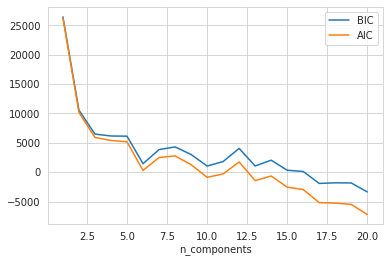

In [0]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [0]:
gmm = GaussianMixture(n_components=2)
df1 = df[['dew_point','mean_temp']]
X2 = df1.values
gmm.fit(X2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

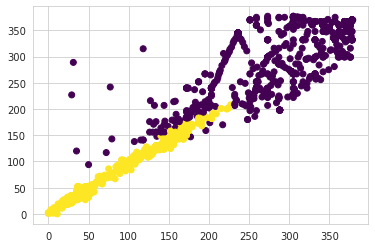

In [0]:
labels = gmm.predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis');

In [0]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[285.07562166 289.9128295 ]
 [ 83.38296571  79.73560679]]


[[[5447.68920266 3833.06378599]
  [3833.06378599 4799.24463888]]

 [[3855.37954396 3491.0963957 ]
  [3491.0963957  3203.34774689]]]


# 4. Applying Linear Regression

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = df['dew_point']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [0]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lm = lm.predict(X_test)

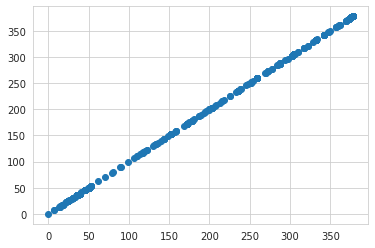

In [0]:
# check visually predictions vs actual values
plt.scatter(y_test,y_pred_lm)

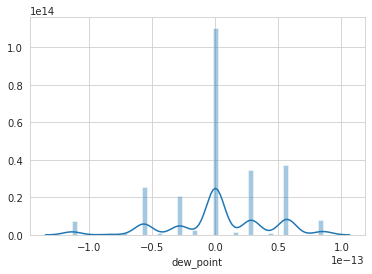

In [0]:
sns.distplot((y_test-y_pred_lm),bins=50);

In [0]:
# check different metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lm))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm)))

MAE: 2.7510757205070546e-14
MSE: 1.646656117236721e-27
RMSE: 4.0579010796675674e-14


In [0]:
#print(classification_report(y_test,y_pred_lm.round()))

In [0]:
'''
# Create and print confusion matrix    
abclf_cm = confusion_matrix(y_test,y_pred_lm.round(), normalize=None)
print(abclf_cm)'''


'\n# Create and print confusion matrix    \nabclf_cm = confusion_matrix(y_test,y_pred_lm.round(), normalize=None)\nprint(abclf_cm)'

In [0]:
# Adictionary to save the accuracy of applying an algorithm
accuracy_dictionary = dict()

In [0]:
'''
lm_accuracy = metrics.accuracy_score(y_test, y_pred_lm.round())
# Adding the accuracy of LinearRegression to the accuracy_dictionary
accuracy_dictionary['LiR'] = lm_accuracy

print("Accuracy:",lm_accuracy)
'''

'\nlm_accuracy = metrics.accuracy_score(y_test, y_pred_lm.round())\n# Adding the accuracy of LinearRegression to the accuracy_dictionary\naccuracy_dictionary[\'LiR\'] = lm_accuracy\n\nprint("Accuracy:",lm_accuracy)\n'

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# 5. Applying Logistic Regression

In [0]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_logmodel = logmodel.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_logmodel))

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        70
           1       0.79      0.97      0.87       242

    accuracy                           0.78       312
   macro avg       0.64      0.54      0.52       312
weighted avg       0.72      0.78      0.71       312



In [0]:
print(confusion_matrix(y_test,y_pred_logmodel))

[[  7  63]
 [  7 235]]


In [0]:
print('Score:', logmodel.score(X_test, y_test))

Score: 0.7756410256410257


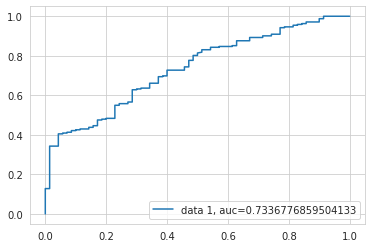

In [0]:
from sklearn import metrics
y_pred_logmodel_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_logmodel_proba)
auc = metrics.roc_auc_score(y_test, y_pred_logmodel_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
# we might add this data to our data set to give us the probability
print("Probability distrubution of the target value:", y_pred_logmodel_proba.view)

Probability distrubution of the target value: <built-in method view of numpy.ndarray object at 0x7f3be37a01c0>


In [0]:
# cross validation K-fold
from sklearn.model_selection import KFold,cross_val_score
scores = [] 
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]
    logmodel.fit(X_train2, y_train2)
    y_pred_logmodel2 = logmodel.predict(X_test)
    scores.append(logmodel.score(X_test2, y_test2))

In [0]:
print(np.mean(scores))

0.7837179487179486


In [0]:
logmodel_accuracy = metrics.accuracy_score(y_test, y_pred_logmodel)
# Adding the accuracy of LogisticRegression to the accuracy_dictionary
accuracy_dictionary['LR'] = logmodel_accuracy

print("Accuracy:",lm_accuracy)

Accuracy: 0.7884615384615384


# 6. Applying Gaussian Naive Bayes

In [0]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_gnb = gnb.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.36      0.23      0.28        70
           1       0.80      0.88      0.84       242

    accuracy                           0.74       312
   macro avg       0.58      0.56      0.56       312
weighted avg       0.70      0.74      0.71       312



In [0]:
print(confusion_matrix(y_test,y_pred_gnb))

[[ 16  54]
 [ 28 214]]


In [0]:
print('Score:', gnb.score(X_test, y_test))

Score: 0.7371794871794872


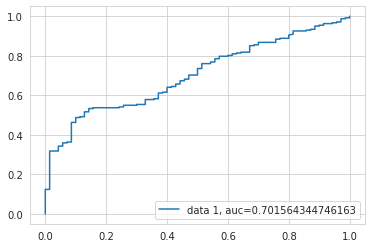

In [0]:
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
auc = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
# cross validation K-fold
scores = [] 
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]
    gnb.fit(X_train2, y_train2)
    scores.append(gnb.score(X_test2, y_test2))

In [0]:
print(np.mean(scores))

0.7240942928039702


In [0]:
gnb_accuracy = metrics.accuracy_score(y_test, y_pred_gnb)
# Adding the accuracy of GaussianNB to the accuracy_dictionary
accuracy_dictionary['NB'] = gnb_accuracy

print("Accuracy:",gnb_accuracy)

Accuracy: 0.7371794871794872


# 7. Applying Decision Tree

In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [0]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred_dt = dtree.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56        70
           1       0.88      0.84      0.86       242

    accuracy                           0.79       312
   macro avg       0.70      0.72      0.71       312
weighted avg       0.80      0.79      0.79       312



In [0]:
print(confusion_matrix(y_test,y_pred_dt))

[[ 42  28]
 [ 38 204]]


In [0]:
print('Score:', dtree.score(X_test, y_test))

Score: 0.7884615384615384


In [0]:
# cross validation K-fold
from sklearn.model_selection import KFold
scores = [] 
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dtree.fit(X_train, y_train)
    scores.append(dtree.score(X_test, y_test))

In [0]:
print(np.mean(scores))

0.71904052936311


In [0]:
!apt-get install python-pydot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pydot is already the newest version (1.2.3-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
!pip install pydotplus

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

## Build tree

In [0]:
clf = dtree

In [0]:

label = ['density_per_km',
         'mosquito_dist','mean_temp',
         'dew_point','precipitation',
         'wind','gdp']
         

In [0]:

'''label = ['location',	'date',	'density_per_km',	'location_type',
         'latitude',	'longitude',	'mosquito_dist',	'max_temp',	'mean_temp',
         'min_temp',
         'dew_point',	'precipitation',	'wind',	'gdp']
         '''

"label = ['location',\t'date',\t'density_per_km',\t'location_type',\n         'latitude',\t'longitude',\t'mosquito_dist',\t'max_temp',\t'mean_temp',\n         'min_temp',\n         'dew_point',\t'precipitation',\t'wind',\t'gdp']\n         "

## Visualize

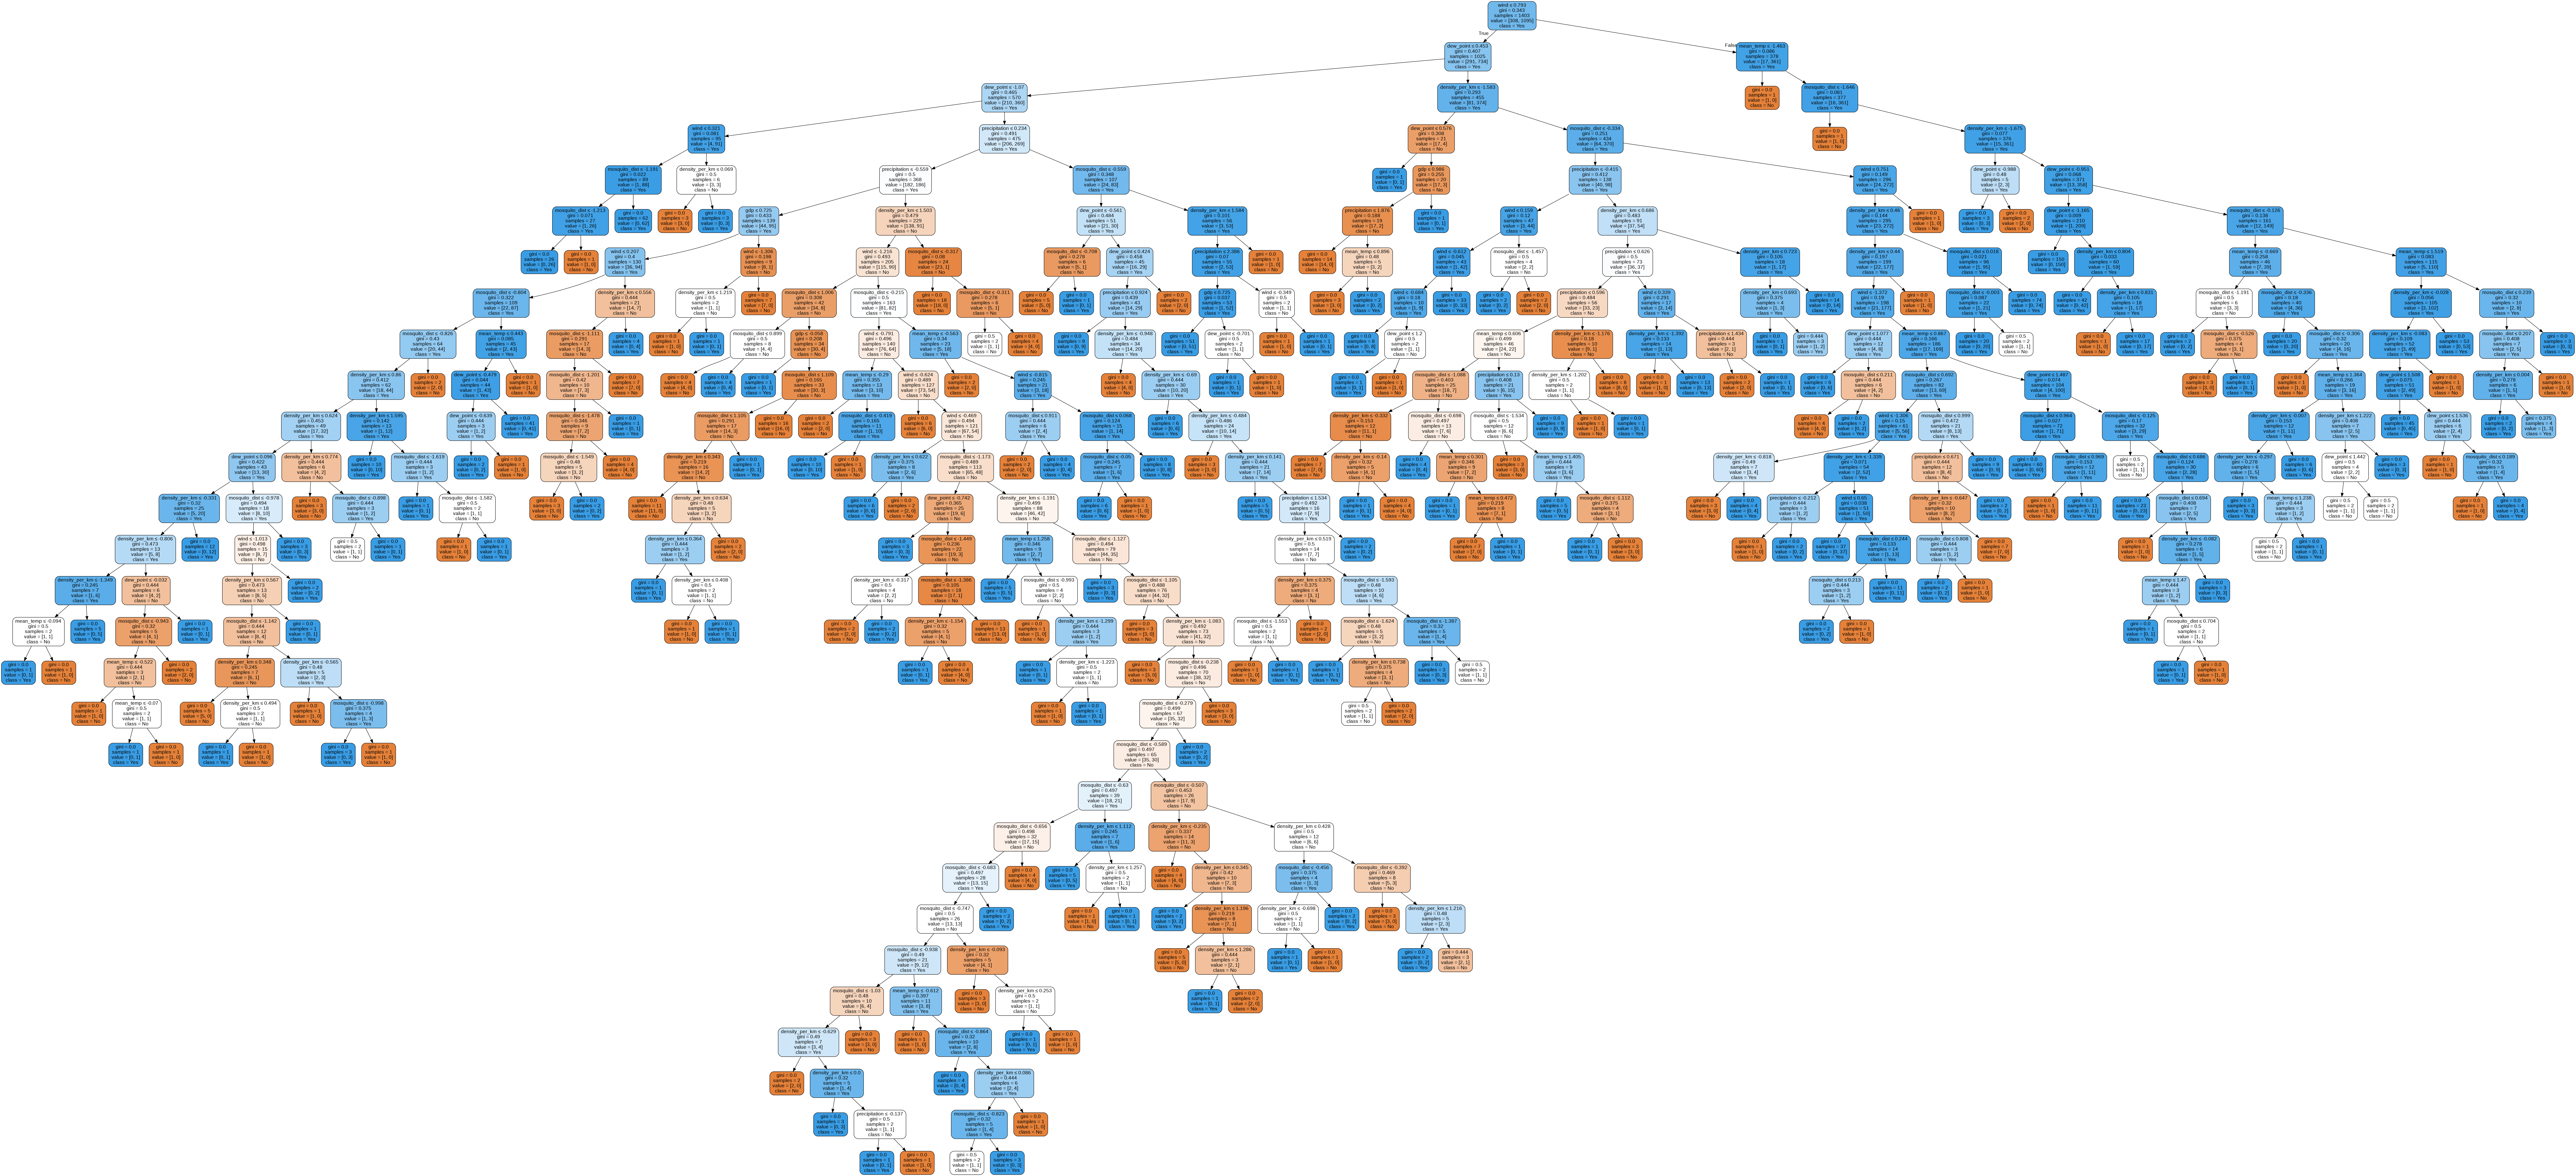

In [0]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,
                special_characters=True,feature_names = label,
                class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png('ZikaTree.png') 
Image(graph.create_png())

In [0]:
#dt_accuracy = metrics.accuracy_score(y_test, y_pred_dt)
# Adding the accuracy of DecisionTreeClassifier to the accuracy_dictionary
#accuracy_dictionary['DT'] = dt_accuracy

#print("Accuracy:",dt_accuracy)

# 8. Applying Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,max_features = 7)

In [0]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_rfc = rfc.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.76      0.41      0.53        54
           1       0.75      0.93      0.83       101

    accuracy                           0.75       155
   macro avg       0.75      0.67      0.68       155
weighted avg       0.75      0.75      0.72       155



In [0]:
print(confusion_matrix(y_test,y_pred_rfc))

[[22 32]
 [ 7 94]]


In [0]:
print('Score:', rfc.score(X_test, y_test))

Score: 0.7483870967741936


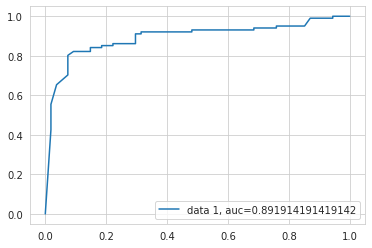

In [0]:
y_pred_rfc_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
auc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
rfc_accuracy = metrics.accuracy_score(y_test, y_pred_rfc)
# Adding the accuracy of RandomForest to the accuracy_dictionary
accuracy_dictionary['RF'] = rfc_accuracy

print("Accuracy:",rfc_accuracy)

Accuracy: 0.7483870967741936


# 9. Applying KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

**Finding the best K in KNN to have a high accuracy**

In [0]:
# trying running from k=1 trough 30 and recording the test accuracy 
k_range = range(1,31)
score = {}
score_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(X_train,y_train)
  y_pred_knn = knn.predict(X_test)
  accu = metrics.accuracy_score(y_test,y_pred_knn)
  score[k] = accu
  score_list.append(accu)

In [0]:
k_max = score_list.index(max(score_list)) + 1
print("K with maximum accuracy: ", k_max)
max(score_list)

K with maximum accuracy:  6


0.6903225806451613

Text(0, 0.5, 'Testing accuracy')

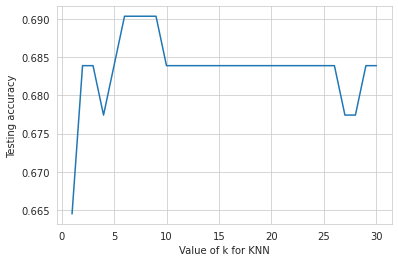

In [0]:
# ploting the relationship between k and the testing accuracy
plt.plot(k_range,score_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')

In [0]:
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred_knn)


0.6774193548387096

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.13      0.22        54
           1       0.68      0.97      0.80       101

    accuracy                           0.68       155
   macro avg       0.69      0.55      0.51       155
weighted avg       0.68      0.68      0.60       155



In [0]:
print(confusion_matrix(y_test,y_pred_knn))

[[ 7 47]
 [ 3 98]]


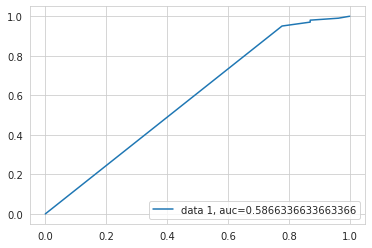

In [0]:
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
auc = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
# Adding the accuracy of KNeighbors to the accuracy_dictionary
accuracy_dictionary['KNN'] = knn_accuracy

print("Accuracy:",knn_accuracy)

Accuracy: 0.6774193548387096


# 10. Applying SVM 

In [0]:
#Import svm model
from sklearn import svm
from sklearn.svm import SVC

In [0]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = svm_clf.predict(X_test)

In [0]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.6516129032258065


In [0]:
# Model Precision: what percentage of 'good' credit risk are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_svm))

# Model Recall: what percentage of 'good' credit risk are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Precision: 0.6516129032258065
Recall: 1.0


In [0]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       101

    accuracy                           0.65       155
   macro avg       0.33      0.50      0.39       155
weighted avg       0.42      0.65      0.51       155



In [0]:
print(confusion_matrix(y_test,y_pred_svm))

[[  0  54]
 [  0 101]]


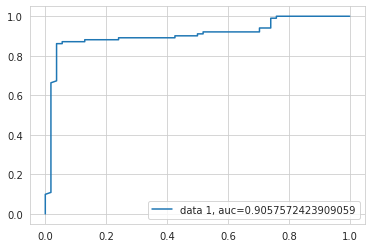

In [0]:
y_pred_svm_proba = svm_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc = metrics.roc_auc_score(y_test, y_pred_svm_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
svm_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
# Adding the accuracy of SVM to the accuracy_dictionary
accuracy_dictionary['SVM'] = svm_accuracy

print("Accuracy:",svm_accuracy)

Accuracy: 0.6516129032258065


# 11. Applying XGBoost

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from xgboost import XGBClassifier

In [0]:
xgb_model=xgb.XGBClassifier()

In [0]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_model.score(X_test,y_test)

0.6774193548387096

In [0]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.11      0.19        54
           1       0.67      0.98      0.80       101

    accuracy                           0.68       155
   macro avg       0.71      0.55      0.50       155
weighted avg       0.70      0.68      0.59       155



In [0]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred_xgb)
print('\naccuracy_score on test dataset: ', accuracy_test)


accuracy_score on test dataset:  0.6774193548387096


In [0]:
print(confusion_matrix(y_test,y_pred_xgb))

[[ 6 48]
 [ 2 99]]


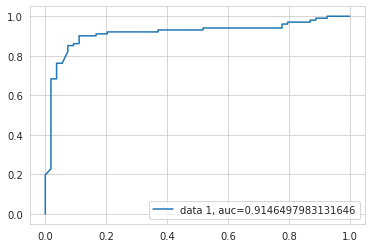

In [0]:
y_pred_xgboost_proba = xgb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_xgboost_proba)
auc = metrics.roc_auc_score(y_test, y_pred_xgboost_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
xgb_accuracy = metrics.accuracy_score(y_test, y_pred_xgb)
# Adding the accuracy of XGboost to the accuracy_dictionary
accuracy_dictionary['XGB'] = xgb_accuracy

print("Accuracy:",xgb_accuracy)

Accuracy: 0.6774193548387096


# Latent Variables and Latent Manifold Identification


# Conclusion

# Comparing the algorithms based on cross_val_score and accuracy score

In [0]:
# to feed the random state
seed = 7

# prepare models
models = []
#models.append(('4. LiR', LinearRegression))
models.append(('5. LR', LogisticRegression()))
models.append(('6. NB', GaussianNB()))
models.append(('7. NB', DecisionTreeClassifier()))
models.append(('8. RF', RandomForestClassifier()))
models.append(('9. KNN', KNeighborsClassifier()))
models.append(('10. SVM', SVC(gamma='auto')))
models.append(('11. XGB', XGBClassifier()))

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [0]:
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

5. LR: 0.757989 (0.149015)
6. NB: 0.579448 (0.145923)
7. NB: 0.716424 (0.116653)
8. RF: 0.792791 (0.139623)
9. KNN: 0.745669 (0.144888)
10. SVM: 0.770010 (0.147827)
11. XGB: 0.798440 (0.145006)


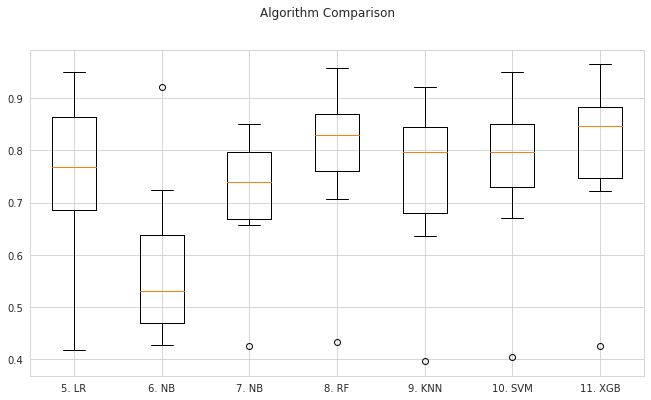

In [0]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
for key in accuracy_dictionary:
  print(key,accuracy_dictionary[key].round(3))

LiR 0.788
LR 0.776
NB 0.737
RF 0.748
KNN 0.677
SVM 0.652
XGB 0.677


<BarContainer object of 7 artists>

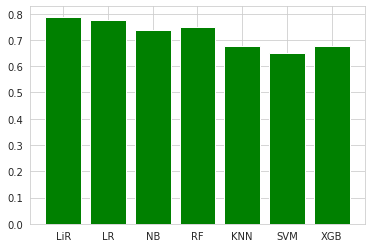

In [0]:
plt.bar(accuracy_dictionary.keys(), accuracy_dictionary.values(), color='g')


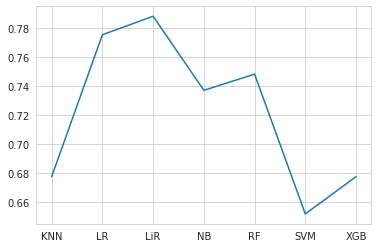

In [0]:
import matplotlib.pylab as plt

lists = sorted(accuracy_dictionary.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()